In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [2]:
def MSD_NGP_func(frame_prev, frame_cur):

    dr2 = []
    
#     part_counter = 0
    
    for particle in frame_cur['particle']:
        
#         if part_counter > 50:
#             break
        
        if (particle in frame_prev['particle'].unique()):
            mask1 = frame_cur['particle'] == particle
            x1 = frame_cur[mask1]['x'].item()
            y1 = frame_cur[mask1]['y'].item()

            mask2 = frame_prev['particle'] == particle
            x2 = frame_prev[mask2]['x'].item()
            y2 = frame_prev[mask2]['y'].item()

            dr2.append( (x2 - x1)**2 + (y2 - y1)**2 )
            
#         part_counter += 1
    
    
    return dr2
    

In [3]:
def Assembly(lag_frame):

    global data
    global max_frame
    
    dr2 = []
    
    for frame in range(1999+lag_frame, max_frame): #range(lag_frame, max_frame):
        frame_prev = data[data['frame'] == frame - lag_frame]
        frame_cur  = data[data['frame'] == frame]
        
        dr2_cur = MSD_NGP_func(frame_prev, frame_cur)
        dr2.extend(dr2_cur)
        
#     print(f'max(dr2) = {max(dr2)}')
            
    if len(dr2) > 0:
        
        dr2_mean = np.mean(dr2)
        msd = dr2_mean
        
#         dr2_lim = [x for x in dr2 if x < 10.]
        dr4 = [x**2 for x in dr2]# if x < 1.]
#         dr2_lim_mean = np.mean(dr2_lim)
        dr4_mean = np.mean(dr4)
        
        ngp = (3 * dr4_mean/(5 * (dr2_mean**2))) - 1
        
#         print(f'max(dr4) = {max(dr4)}')
        
#         print(f'd2_mean = {np.mean(dr2)}')
#         print(f'd4_mean = {np.mean(dr4)}')
#         print(ngp)
    else:
        msd = math.nan
        ngp = math.nan
    
#     print("\n")
    
    return msd, ngp

In [4]:
# def Assembly(frameN):

#     global data
#     global max_frame
    
#     frame_prev = data[data['frame'] == 0]
    
#     frame_cur  = data[data['frame'] == frameN]
        
#     dr2 = MSD_NGP_func(frame_prev, frame_cur)
        
        
#     if len(dr2) > 0:
#         dr2_mean = np.mean(dr2)
#         msd = dr2_mean
        
#         dr4 = [x**2 for x in dr2]
#         dr4_mean = np.mean(dr4)
        
#         ngp = 3*dr4_mean/(5*(dr2_mean**2)) - 1
#     else:
#         msd = math.nan
#         ngp = math.nan

    
#     return msd, ngp

In [5]:
def read_data():
    
    file_path = 'data_out/backup/feb20_S9_t_corrected.csv'
    
    usecols = ['y', 'x', 'frame', 'particle']
    
    data = pd.read_csv(file_path, usecols=usecols)
    
    
    return data

In [6]:
%%time

# check if file already exists
# path = 'data_out/NGP_S5.dat'
# if os.path.isfile(path):
#     lag_frame, NGP = read_from_file(path)
# else:


data = read_data()
data_frame0 = data[data['frame'] == 0]
max_frame = data['frame'].values[-1] + 1

MSD = []
NGP = []
lag_frame = []

for lg in range(1, max_frame):
# lg = 1
# while lg < max_frame:
    
    assembly_MSD, assembly_NGP = Assembly(lg)

    if math.isnan(assembly_MSD) or math.isnan(assembly_NGP):
        print('no common particles')
        continue
    else:
        MSD.append(assembly_MSD)
        NGP.append(assembly_NGP)
        lag_frame.append(lg)
        print(f'lg = {lg} V')
        
#     if lg <= 10:
#         step = 1
#     elif lg <= 100:
#         step = 10
#     else:
#         step = 100
        
#     lg += step

lg = 1 V
lg = 2 V
lg = 3 V
lg = 4 V
lg = 5 V
lg = 6 V
lg = 7 V
lg = 8 V
lg = 9 V
lg = 10 V
lg = 11 V
lg = 12 V
lg = 13 V
lg = 14 V
lg = 15 V
lg = 16 V
lg = 17 V
lg = 18 V
lg = 19 V
lg = 20 V
lg = 21 V
lg = 22 V
lg = 23 V
lg = 24 V
lg = 25 V
lg = 26 V
lg = 27 V
lg = 28 V
lg = 29 V
lg = 30 V
lg = 31 V
lg = 32 V
lg = 33 V
lg = 34 V
lg = 35 V
lg = 36 V
lg = 37 V
lg = 38 V
lg = 39 V
lg = 40 V
lg = 41 V
lg = 42 V
lg = 43 V
lg = 44 V
lg = 45 V
lg = 46 V
lg = 47 V
lg = 48 V
lg = 49 V
lg = 50 V
lg = 51 V
lg = 52 V
lg = 53 V
lg = 54 V
lg = 55 V
lg = 56 V
lg = 57 V
lg = 58 V
lg = 59 V
lg = 60 V
lg = 61 V
lg = 62 V
lg = 63 V
lg = 64 V
lg = 65 V
lg = 66 V
lg = 67 V
lg = 68 V
lg = 69 V
lg = 70 V
lg = 71 V
lg = 72 V
lg = 73 V
lg = 74 V
lg = 75 V
lg = 76 V
lg = 77 V
lg = 78 V
lg = 79 V
lg = 80 V
lg = 81 V
lg = 82 V
lg = 83 V
lg = 84 V
lg = 85 V
lg = 86 V
lg = 87 V
lg = 88 V
lg = 89 V
lg = 90 V
lg = 91 V
lg = 92 V
lg = 93 V
lg = 94 V
lg = 95 V
lg = 96 V
lg = 97 V
lg = 98 V
lg = 99 V
lg = 100 V
lg = 101

lg = 756 V
lg = 757 V
lg = 758 V
lg = 759 V
lg = 760 V
lg = 761 V
lg = 762 V
lg = 763 V
lg = 764 V
lg = 765 V
lg = 766 V
lg = 767 V
lg = 768 V
lg = 769 V
lg = 770 V
lg = 771 V
lg = 772 V
lg = 773 V
lg = 774 V
lg = 775 V
lg = 776 V
lg = 777 V
lg = 778 V
lg = 779 V
lg = 780 V
lg = 781 V
lg = 782 V
lg = 783 V
lg = 784 V
lg = 785 V
lg = 786 V
lg = 787 V
lg = 788 V
lg = 789 V
lg = 790 V
lg = 791 V
lg = 792 V
lg = 793 V
lg = 794 V
lg = 795 V
lg = 796 V
lg = 797 V
lg = 798 V
lg = 799 V
lg = 800 V
lg = 801 V
lg = 802 V
lg = 803 V
lg = 804 V
lg = 805 V
lg = 806 V
lg = 807 V
lg = 808 V
lg = 809 V
lg = 810 V
lg = 811 V
lg = 812 V
lg = 813 V
lg = 814 V
lg = 815 V
lg = 816 V
lg = 817 V
lg = 818 V
lg = 819 V
lg = 820 V
lg = 821 V
lg = 822 V
lg = 823 V
lg = 824 V
lg = 825 V
lg = 826 V
lg = 827 V
lg = 828 V
lg = 829 V
lg = 830 V
lg = 831 V
lg = 832 V
lg = 833 V
lg = 834 V
lg = 835 V
lg = 836 V
lg = 837 V
lg = 838 V
lg = 839 V
lg = 840 V
lg = 841 V
lg = 842 V
lg = 843 V
lg = 844 V
lg = 845 V
lg = 846 V

lg = 1460 V
lg = 1461 V
lg = 1462 V
lg = 1463 V
lg = 1464 V
lg = 1465 V
lg = 1466 V
lg = 1467 V
lg = 1468 V
lg = 1469 V
lg = 1470 V
lg = 1471 V
lg = 1472 V
lg = 1473 V
lg = 1474 V
lg = 1475 V
lg = 1476 V
lg = 1477 V
lg = 1478 V
lg = 1479 V
lg = 1480 V
lg = 1481 V
lg = 1482 V
lg = 1483 V
lg = 1484 V
lg = 1485 V
lg = 1486 V
lg = 1487 V
lg = 1488 V
lg = 1489 V
lg = 1490 V
lg = 1491 V
lg = 1492 V
lg = 1493 V
lg = 1494 V
lg = 1495 V
lg = 1496 V
lg = 1497 V
lg = 1498 V
lg = 1499 V
lg = 1500 V
lg = 1501 V
lg = 1502 V
lg = 1503 V
lg = 1504 V
lg = 1505 V
lg = 1506 V
lg = 1507 V
lg = 1508 V
lg = 1509 V
lg = 1510 V
lg = 1511 V
lg = 1512 V
lg = 1513 V
lg = 1514 V
lg = 1515 V
lg = 1516 V
lg = 1517 V
lg = 1518 V
lg = 1519 V
lg = 1520 V
lg = 1521 V
lg = 1522 V
lg = 1523 V
lg = 1524 V
lg = 1525 V
lg = 1526 V
lg = 1527 V
lg = 1528 V
lg = 1529 V
lg = 1530 V
lg = 1531 V
lg = 1532 V
lg = 1533 V
lg = 1534 V
lg = 1535 V
lg = 1536 V
lg = 1537 V
lg = 1538 V
lg = 1539 V
lg = 1540 V
lg = 1541 V
lg = 1542 V
lg =

lg = 2143 V
lg = 2144 V
lg = 2145 V
lg = 2146 V
lg = 2147 V
lg = 2148 V
lg = 2149 V
lg = 2150 V
lg = 2151 V
lg = 2152 V
lg = 2153 V
lg = 2154 V
lg = 2155 V
lg = 2156 V
lg = 2157 V
lg = 2158 V
lg = 2159 V
lg = 2160 V
lg = 2161 V
lg = 2162 V
lg = 2163 V
lg = 2164 V
lg = 2165 V
lg = 2166 V
lg = 2167 V
lg = 2168 V
lg = 2169 V
lg = 2170 V
lg = 2171 V
lg = 2172 V
lg = 2173 V
lg = 2174 V
lg = 2175 V
lg = 2176 V
lg = 2177 V
lg = 2178 V
lg = 2179 V
lg = 2180 V
lg = 2181 V
lg = 2182 V
lg = 2183 V
lg = 2184 V
lg = 2185 V
lg = 2186 V
lg = 2187 V
lg = 2188 V
lg = 2189 V
lg = 2190 V
lg = 2191 V
lg = 2192 V
lg = 2193 V
lg = 2194 V
lg = 2195 V
lg = 2196 V
lg = 2197 V
lg = 2198 V
lg = 2199 V
lg = 2200 V
lg = 2201 V
lg = 2202 V
lg = 2203 V
lg = 2204 V
lg = 2205 V
lg = 2206 V
lg = 2207 V
lg = 2208 V
lg = 2209 V
lg = 2210 V
lg = 2211 V
lg = 2212 V
lg = 2213 V
lg = 2214 V
lg = 2215 V
lg = 2216 V
lg = 2217 V
lg = 2218 V
lg = 2219 V
lg = 2220 V
lg = 2221 V
lg = 2222 V
lg = 2223 V
lg = 2224 V
lg = 2225 V
lg =

lg = 2826 V
lg = 2827 V
lg = 2828 V
lg = 2829 V
lg = 2830 V
lg = 2831 V
lg = 2832 V
lg = 2833 V
lg = 2834 V
lg = 2835 V
lg = 2836 V
lg = 2837 V
lg = 2838 V
lg = 2839 V
lg = 2840 V
lg = 2841 V
lg = 2842 V
lg = 2843 V
lg = 2844 V
lg = 2845 V
lg = 2846 V
lg = 2847 V
lg = 2848 V
lg = 2849 V
lg = 2850 V
lg = 2851 V
lg = 2852 V
lg = 2853 V
lg = 2854 V
lg = 2855 V
lg = 2856 V
lg = 2857 V
lg = 2858 V
lg = 2859 V
lg = 2860 V
lg = 2861 V
lg = 2862 V
lg = 2863 V
lg = 2864 V
lg = 2865 V
lg = 2866 V
lg = 2867 V
lg = 2868 V
lg = 2869 V
lg = 2870 V
lg = 2871 V
lg = 2872 V
lg = 2873 V
lg = 2874 V
lg = 2875 V
lg = 2876 V
lg = 2877 V
lg = 2878 V
lg = 2879 V
lg = 2880 V
lg = 2881 V
lg = 2882 V
lg = 2883 V
lg = 2884 V
lg = 2885 V
lg = 2886 V
lg = 2887 V
lg = 2888 V
lg = 2889 V
lg = 2890 V
lg = 2891 V
lg = 2892 V
lg = 2893 V
lg = 2894 V
lg = 2895 V
lg = 2896 V
lg = 2897 V
lg = 2898 V
lg = 2899 V
lg = 2900 V
lg = 2901 V
lg = 2902 V
lg = 2903 V
lg = 2904 V
lg = 2905 V
lg = 2906 V
lg = 2907 V
lg = 2908 V
lg =

In [7]:
# convert to microns
px_to_micron = 0.06905
frame_to_sec = 1./120.

In [8]:
lag_frame_sec = [i*frame_to_sec for i in lag_frame]
MSD_micron = [i*px_to_micron*px_to_micron for i in MSD]

In [9]:
# # read from file MSD
# lag_fr_MSD_prev = []
# MSD_prev = []

# with open('data_out/backup/MSD_S5.dat') as f:
#     next(f)
#     for rows in f:
#         lag_fr_MSD_prev.append( float(rows.split(',')[0]) )
#         MSD_prev.append( float(rows.split(',')[1]) )

In [10]:
MSD_trackpy = pd.read_csv('data_out/backup/feb20_S9_EMSD.csv')
# MSD_trackpy.head

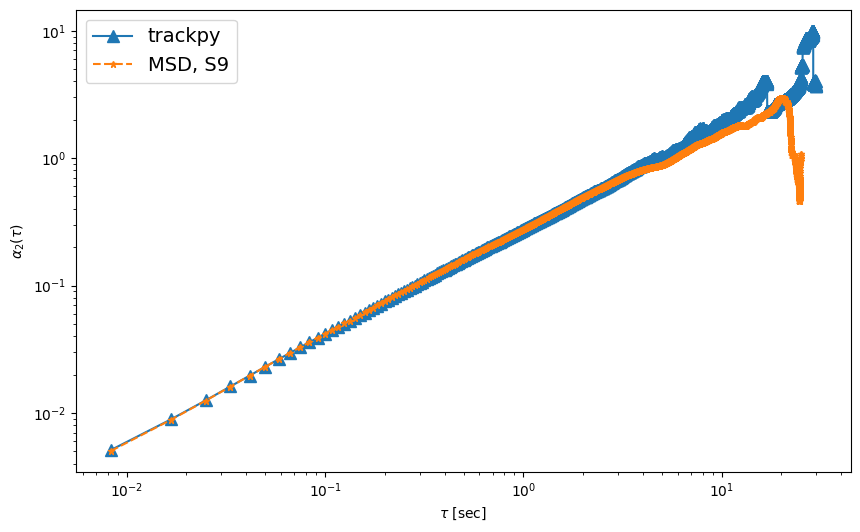

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(MSD_trackpy['lag time t'], MSD_trackpy['dr^2'], marker='^', ms=8, label='trackpy')
# ax.plot(lag_fr_MSD_prev, MSD_prev, marker='o', ms=5, ls='--', label='MSD, S5, previous')
ax.plot(lag_frame_sec, MSD_micron, marker='*', ms=5, ls='--', label='MSD, S9')

ax.set(ylabel=r'$\alpha_2 (\tau)$',
      xlabel=r'$\tau$ [sec]')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend (fontsize=14)

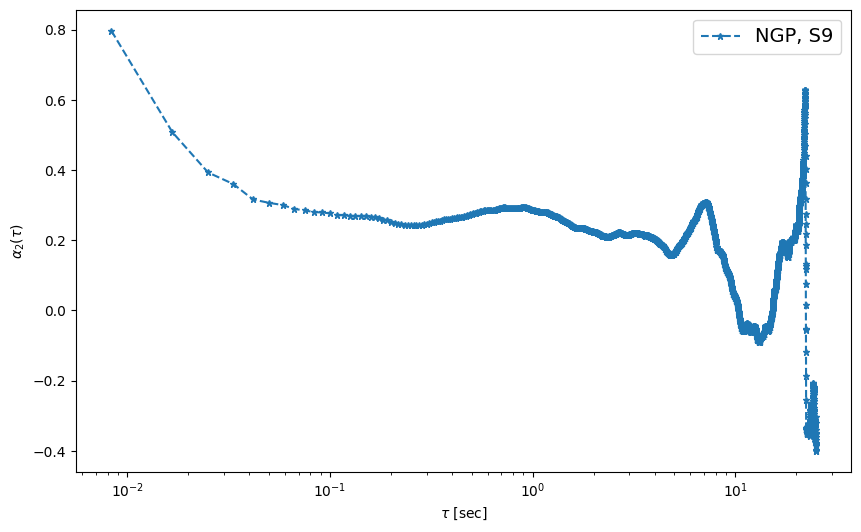

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(lag_frame_sec, NGP, marker='*', ms=5, ls='--', label='NGP, S9')

ax.set(ylabel=r'$\alpha_2 (\tau)$',
      xlabel=r'$\tau$ [sec]')
ax.set_xscale('log')
# ax.set_yscale('log')
plt.legend (fontsize=14)

In [13]:
# write to file
DIR = 'data_out/'

file_MSD = DIR + 'MSD_S9.dat'
file_NGP = DIR + 'NGP_S9.dat'

data_out_dict_MSD = {"lag_frame[sec]": lag_frame_sec, "MSD_[px^2]": MSD}
data_out_dict_NGP = {"lag_frame[sec]": lag_frame_sec, "NGP_[dimensionless]": NGP}

data_out_MSD = pd.DataFrame(data_out_dict_MSD)
data_out_NGP = pd.DataFrame(data_out_dict_NGP)

data_out_MSD.to_csv(file_MSD, index=False)
data_out_NGP.to_csv(file_NGP, index=False)